In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import os
import pyranges as pr
import gseapy as gp
from gseapy import barplot, dotplot
import json

In [2]:
data_path = '/home/che/TRIM/git/tcr/figures/figure5'

In [5]:
# Load in the DE 50 gene list from de_50_genes.txt
with open(f"{data_path}/de_50_genes.txt", "r") as f:
    de_50_genes = [line.strip() for line in f]
len(de_50_genes)

50

In [6]:
# read in the whole gene list
with open('/home/che/TRIM/data_processed/combined_data_columns.npz', 'rb') as f:
    npzfile = np.load(f, allow_pickle=True)
    combined_data_columns = npzfile['cols']
complete_gene_list = combined_data_columns.tolist()
len(complete_gene_list)

29750

### Now, perform gene set enrichment analysis for each list

- gene_list: important genes found by each method
- backgroun: all genes in the genome (measured in RNA-seq)

In [8]:
background_genes = complete_gene_list

# Run enrichment analysis
enr = gp.enrichr(
        gene_list=de_50_genes,
        gene_sets='GO_Biological_Process_2018', 
        organism='Human',
        background=background_genes,
        outdir=None,
        cutoff=0.05,
    )

enr_df_temp = enr.results
enr_df_temp[enr_df_temp['Adjusted P-value'] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,negative regulation of cell cycle G1/S phase t...,0.000007,0.002033,0,0,99.712206,1187.538094,CDKN1A;KLF4;MYO16
1,GO_Biological_Process_2018,negative regulation of G1/S transition of mito...,0.000009,0.002033,0,0,90.209726,1049.926544,CDKN1A;KLF4;MYO16
2,GO_Biological_Process_2018,regulation of G1/S transition of mitotic cell ...,0.000064,0.007100,0,0,44.023256,424.817724,CDKN1A;KLF4;MYO16
3,GO_Biological_Process_2018,negative regulation of heterotypic cell-cell a...,0.000077,0.007100,0,0,206.208333,1953.120033,IL10;KLF4
4,GO_Biological_Process_2018,regulation of cell-cell adhesion involved in g...,0.000077,0.007100,0,0,206.208333,1953.120033,IL10;KLF4
5,GO_Biological_Process_2018,negative regulation of chemokine production (G...,0.000213,0.016394,0,0,112.458333,950.548453,IL10;KLF4
6,GO_Biological_Process_2018,negative regulation of mitotic cell cycle phas...,0.000311,0.018975,0,0,25.212766,203.615908,CDKN1A;KLF4;MYO16
7,GO_Biological_Process_2018,negative regulation of interleukin-8 productio...,0.000370,0.018975,0,0,82.458333,651.486723,IL10;KLF4
8,GO_Biological_Process_2018,regulation of heterotypic cell-cell adhesion (...,0.000370,0.018975,0,0,82.458333,651.486723,IL10;KLF4
9,GO_Biological_Process_2018,cytokine-mediated signaling pathway (GO:0019221),0.000536,0.023870,0,0,6.568934,49.479141,IL10;IL21;CDKN1A;CSF2;CCL20;IL9R


/home/che/anaconda3/envs/trim/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/che/anaconda3/envs/trim/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


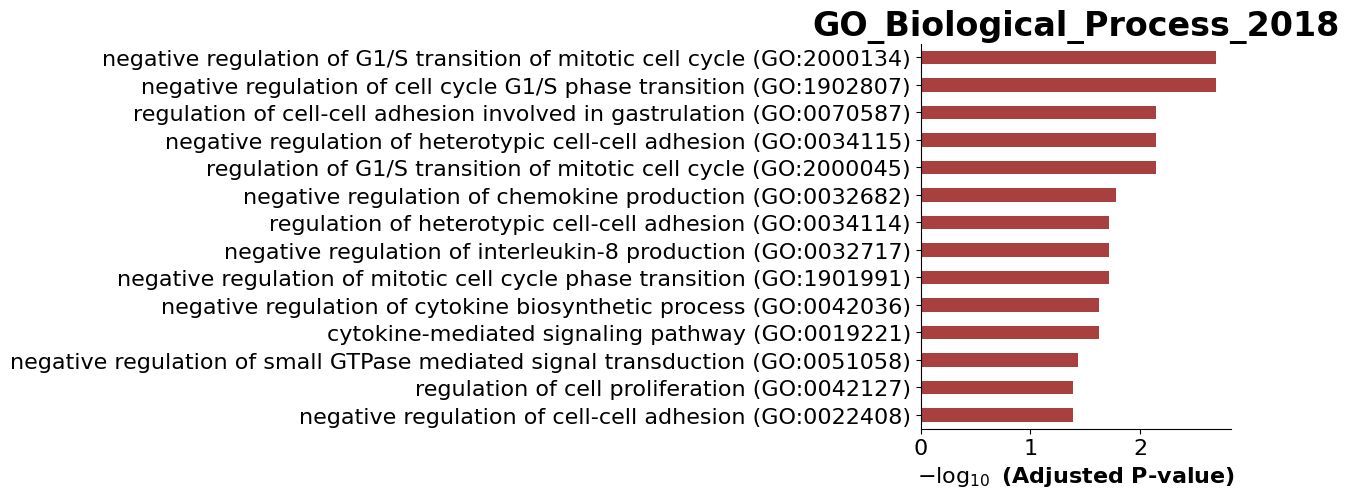

In [12]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot

# Create the barplot
ax = barplot(enr.res2d, 
             title='GO_Biological_Process_2018', 
             figsize=(4, 5), 
             color='darkred', 
             top_term=15)

# Get the figure from the axes
fig = ax.get_figure()

# Save in both PNG and SVG formats
fig.savefig(f"{data_path}/de_50_barplot_GO_BP.png", dpi=300, bbox_inches='tight')
fig.savefig(f"{data_path}/de_50_barplot_GO_BP.svg", bbox_inches='tight')